In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv("data/city_hour.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Check for nulls and data types
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Convert datetime column if needed
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    print("\nDatetime column converted.")

# Summary
print("\nStatistical summary:\n", df.describe())


Shape of dataset: (438245, 16)

First 5 rows:
         City             Datetime  PM2.5   PM10     NO   NO2    NOx   NH3  \
0      Delhi  2015-01-01 00:00:00  258.0  340.6  191.0  13.4  104.1  16.2   
1     Mumbai  2015-01-01 00:00:00  120.1   47.9  165.3  57.9  139.2  14.4   
2    Chennai  2015-01-01 00:00:00  130.1  375.0   21.9  23.7  205.6  33.6   
3    Kolkata  2015-01-01 00:00:00  189.1  174.3  139.7  58.9  103.7  19.2   
4  Bangalore  2015-01-01 00:00:00  357.8   48.8  121.2  83.3    8.3  11.9   

     CO   SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  1.15  39.8   70.4    11.64    10.23    1.95  411.5   Moderate  
1  0.76   3.3   23.2    11.35    11.38    1.53  134.8       Poor  
2  3.50  63.0  138.9    16.30    24.07    0.56  329.6       Poor  
3  0.81   3.3   14.6     5.12     1.42    2.35  351.9       Good  
4  6.31  67.4  195.9    15.12    16.80    8.95   23.7   Moderate  

Missing values:
 City          0
Datetime      0
PM2.5         0
PM10          0
NO    

In [3]:
print(df.columns.tolist())

['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [4]:
# Extracting time-based features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day

In [5]:
# unique cities
print("Number of cities:", df['City'].nunique())
print("Cities:", df['City'].unique())

Number of cities: 5
Cities: ['Delhi' 'Mumbai' 'Chennai' 'Kolkata' 'Bangalore']


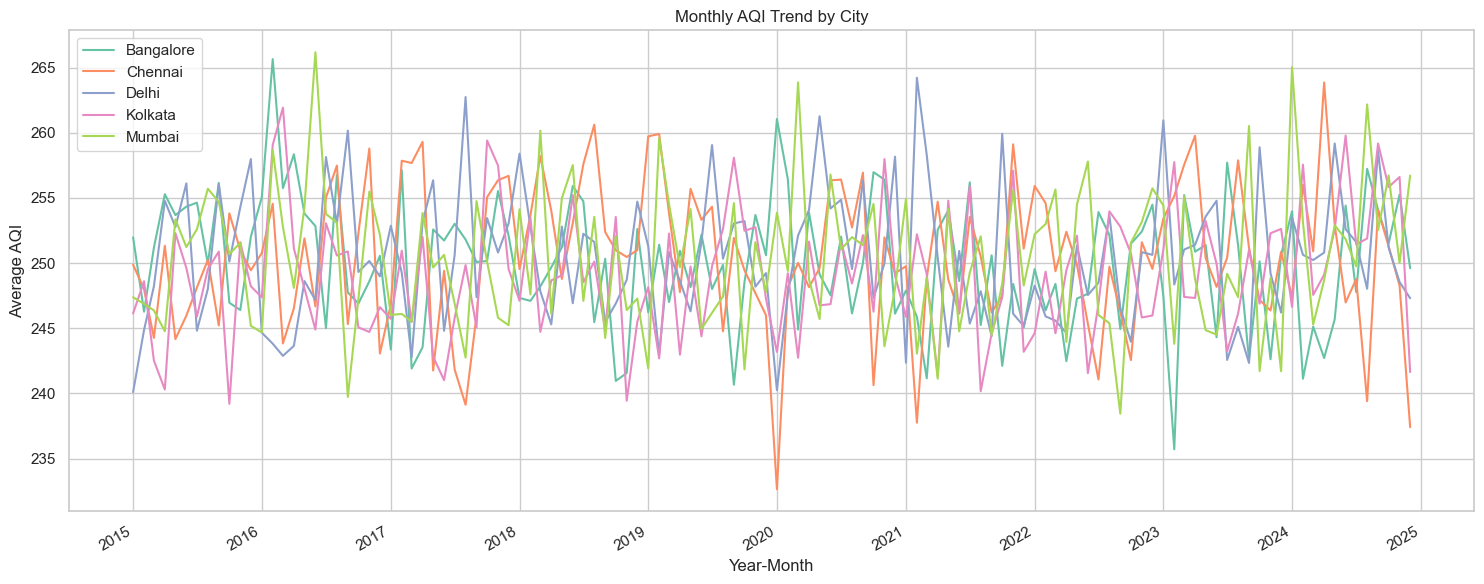

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")  # This is clean and works across all versions

sns.set_palette("Set2")

# Group and average AQI by Month and City
monthly_trend = df.groupby(['City', 'Year', 'Month'])['AQI'].mean().reset_index()

# Create a 'Year-Month' label
monthly_trend['YearMonth'] = monthly_trend['Year'].astype(str) + '-' + monthly_trend['Month'].astype(str).str.zfill(2)
monthly_trend['Date'] = pd.to_datetime(monthly_trend['YearMonth'])

# Plot AQI trend for each city
plt.figure(figsize=(15, 6))
for city in monthly_trend['City'].unique():
    city_data = monthly_trend[monthly_trend['City'] == city]
    plt.plot(city_data['Date'], city_data['AQI'], label=city)

plt.gcf().autofmt_xdate()  # Auto-rotate and format dates nicely
plt.xlabel("Year-Month")
plt.ylabel("Average AQI")
plt.title("Monthly AQI Trend by City")
plt.legend()
plt.tight_layout()
plt.show()


# Objective
Compare pollutants like:

PM2.5, PM10, NO, NO2, NOx, CO, SO2, O3, NH3
across the 5 cities using boxplots or barplots to highlight distribution or average levels.

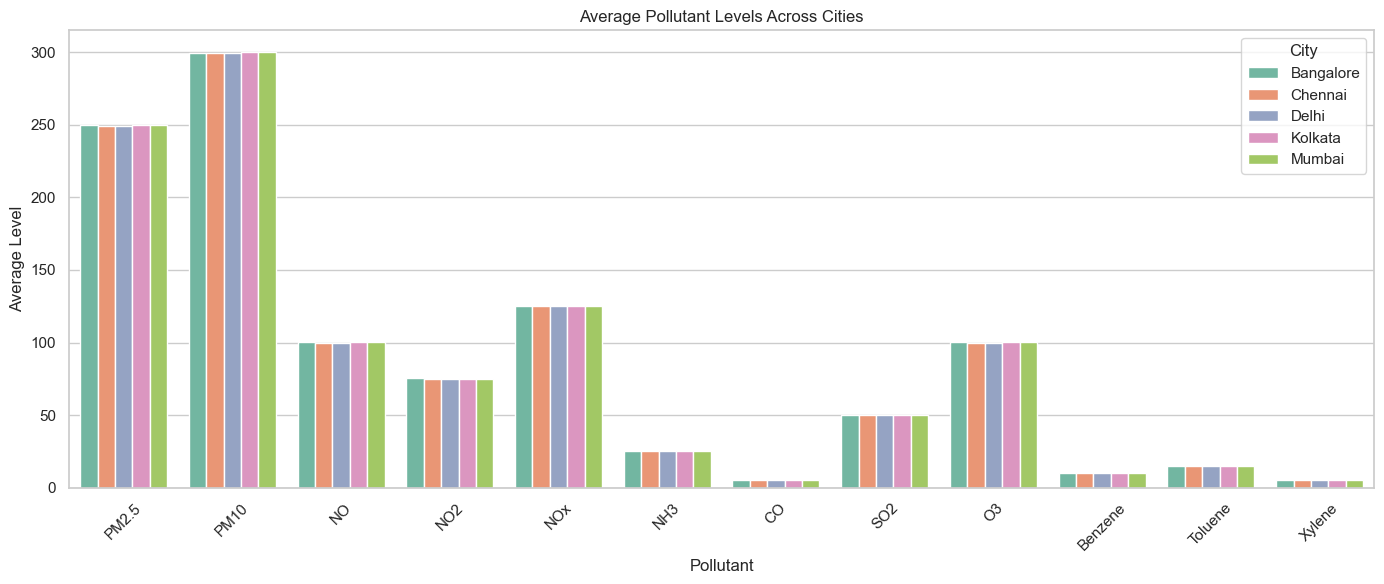

In [19]:
pollutants=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
pollutant_data = df[['City'] + pollutants].dropna()
city_pollutants = pollutant_data.groupby('City')[pollutants].mean().reset_index()

pollutant_melted = city_pollutants.melt(id_vars='City',var_name='Pollutant',value_name='Average Level')

plt.figure(figsize=(14, 6))
sns.barplot(data=pollutant_melted, x='Pollutant', y='Average Level', hue='City')
plt.title("Average Pollutant Levels Across Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
print(city_pollutants.head())


        City       PM2.5        PM10          NO        NO2         NOx  \
0  Bangalore  249.661791  299.519574  100.481468  75.304667  125.048069   
1    Chennai  249.127333  299.180640   99.810190  75.047151  125.162313   
2      Delhi  249.080076  299.479919   99.928824  74.910871  125.244333   
3    Kolkata  249.567866  300.074470  100.121979  75.033413  124.879102   
4     Mumbai  249.653413  299.943484  100.046684  75.061101  124.864806   

         NH3        CO        SO2          O3    Benzene    Toluene    Xylene  
0  24.983351  5.006207  50.086643  100.186835  10.014634  15.004828  4.990940  
1  25.053454  5.012302  50.135656   99.502517   9.997619  14.956116  5.004258  
2  25.042063  5.004110  50.168148   99.939438   9.956729  14.988931  4.997823  
3  25.092666  4.991153  50.060367  100.183368   9.997840  14.986345  4.985491  
4  24.934404  4.997729  49.992496  100.100436  10.003136  15.038959  4.991553  


# Goal: See how AQI varies city to city

In [9]:
import pandas as pd

# Use a new variable to avoid confusion
raw_df = pd.read_csv("data/city_hour.csv")
print(raw_df[['City', 'AQI']].dropna().head(10))
print(raw_df['City'].value_counts())


        City    AQI
0      Delhi  411.5
1     Mumbai  134.8
2    Chennai  329.6
3    Kolkata  351.9
4  Bangalore   23.7
5      Delhi   22.9
6     Mumbai  315.9
7    Chennai  185.8
8    Kolkata   42.1
9  Bangalore   99.9
City
Delhi        87649
Mumbai       87649
Chennai      87649
Kolkata      87649
Bangalore    87649
Name: count, dtype: int64


In [12]:
grouped_stats = raw_df.groupby("City")["AQI"].describe()
print(grouped_stats)

             count        mean         std  min    25%    50%    75%    max
City                                                                       
Bangalore  87649.0  250.007594  143.954876  0.0  125.8  249.8  374.6  500.0
Chennai    87649.0  250.493395  143.974527  0.0  125.6  250.9  375.5  500.0
Delhi      87649.0  250.455380  144.407274  0.0  125.6  250.7  375.6  500.0
Kolkata    87649.0  249.123838  144.074434  0.0  124.8  247.7  373.8  500.0
Mumbai     87649.0  250.397578  144.232252  0.0  125.2  251.1  375.5  500.0


In [14]:
# Load station_hour.csv
station_df = pd.read_csv("data/station_hour.csv")

# Check initial rows and columns
print(station_df.head())
print(station_df.columns)
# Show all column names
print(station_df.columns.tolist())

# Check for missing values
print(station_df.isnull().sum())


      City             Datetime     Station  PM2.5   PM10     NO    NO2  \
0    Delhi  2015-01-01 00:00:00  Station_D1  243.1  193.5  182.4   58.8   
1    Delhi  2015-01-01 00:00:00  Station_D2  476.7  504.0  172.4   80.7   
2   Mumbai  2015-01-01 00:00:00  Station_M1  463.9   92.7  142.5   21.7   
3   Mumbai  2015-01-01 00:00:00  Station_M2  447.1  545.1   85.5  124.6   
4  Chennai  2015-01-01 00:00:00  Station_C1  117.6  390.6  149.5  115.4   

     NOx   NH3    CO   SO2     O3  Benzene  Toluene  Xylene    AQI  \
0  100.9  30.4  3.08  24.3  166.7    12.66    18.42    1.91  301.5   
1  114.4  30.3  7.96  48.1   72.9     8.35    26.53    1.66  243.1   
2  130.2  11.3  4.89  99.5  166.5    15.96    24.41    7.88   14.7   
3   66.6  21.3  3.92  61.6  109.3    19.34     6.09    5.37  471.7   
4  222.4  25.2  4.85  15.1  198.3     0.20     6.49    1.69  312.3   

     AQI_Bucket  
0          Good  
1  Satisfactory  
2        Severe  
3     Very Poor  
4  Satisfactory  
Index(['City', 'Date

C:\Users\Pandey's\AppData\Local\Temp\ipykernel_4228\3712665289.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=station_df, x='Station', y='AQI', palette='Set2')


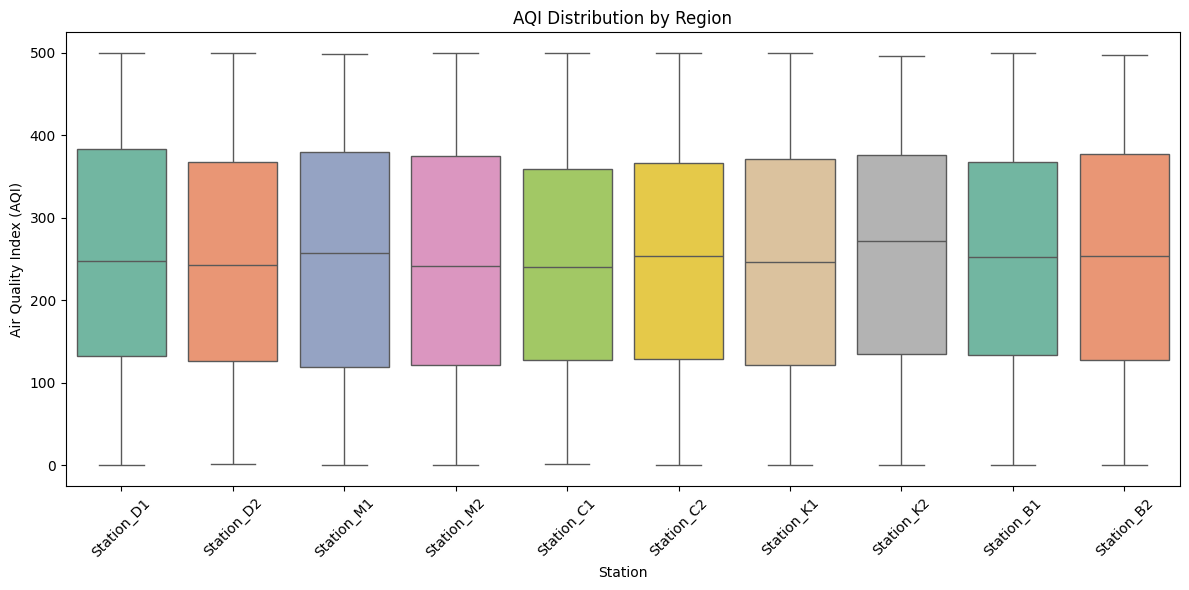

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=station_df, x='Station', y='AQI', palette='Set2')
plt.title("AQI Distribution by Region")
plt.ylabel("Air Quality Index (AQI)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


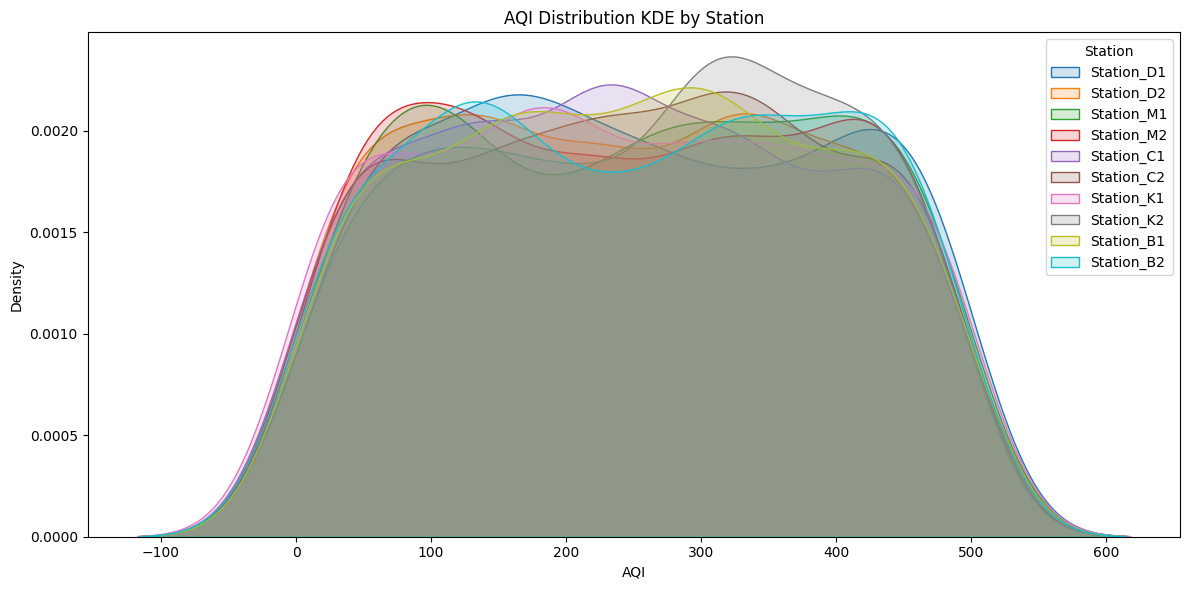

In [16]:
plt.figure(figsize=(12, 6))
for station in station_df['Station'].unique():
    sns.kdeplot(data=station_df[station_df['Station'] == station], x='AQI', label=station, fill=True, alpha=0.2)
    
plt.title("AQI Distribution KDE by Station")
plt.xlabel("AQI")
plt.ylabel("Density")
plt.legend(title="Station")
plt.tight_layout()
plt.show()


# Correlation heat map
 Interpretation :
Values range from -1 to 1:

Closer to 1 → strong positive correlation (pollutant likely increases AQI)

Closer to 0 → weak or no correlation

Closer to -1 → strong negative correlation (rare here)

Look at the AQI row/column to identify top contributing pollutants.

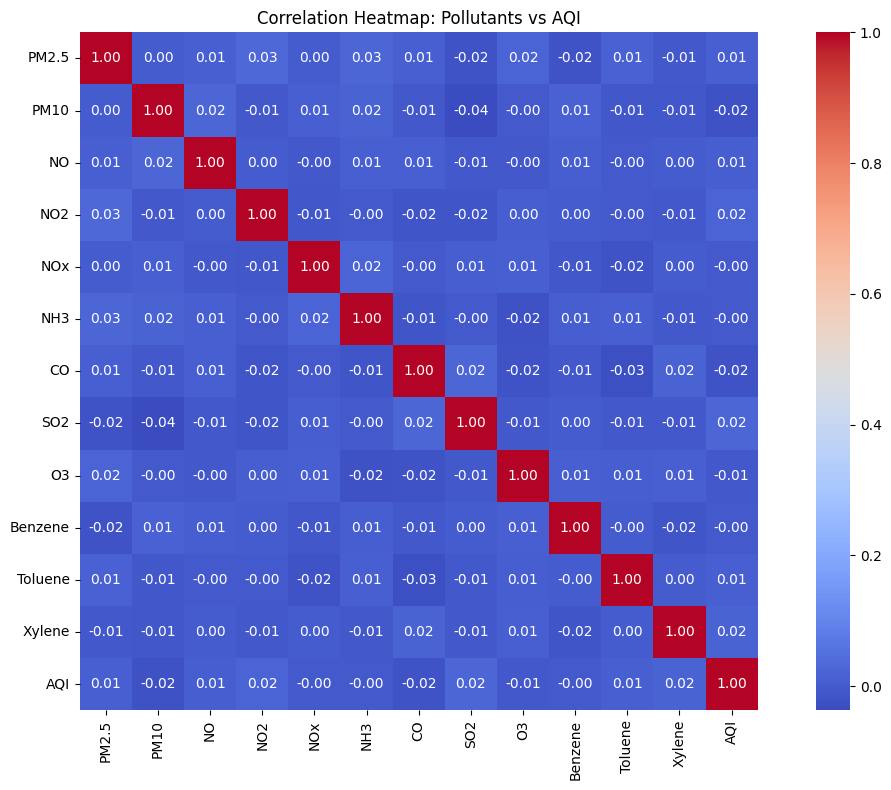

In [17]:
# List of pollutants + AQI
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Keep only these columns, drop rows with missing values
corr_df = station_df[pollutants].dropna()
correlation_matrix = corr_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap: Pollutants vs AQI")
plt.tight_layout()
plt.show()


C:\Users\Pandey's\AppData\Local\Temp\ipykernel_4228\3548874294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_by_city.index, y=avg_aqi_by_city.values, palette='viridis')


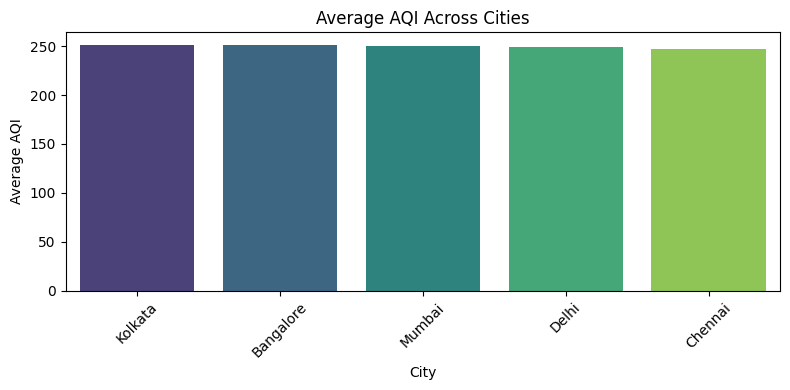

In [20]:
plt.figure(figsize=(8, 4))
avg_aqi_by_city = station_df.groupby('City')['AQI'].mean().sort_values(ascending=False)

sns.barplot(x=avg_aqi_by_city.index, y=avg_aqi_by_city.values, palette='viridis')
plt.title("Average AQI Across Cities")
plt.ylabel("Average AQI")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Load station_hour.csv
station_day_df = pd.read_csv("data/station_day.csv")

# Check initial rows and columns
print(station_day_df.head())
print(station_day_df.columns)
# Show all column names
print(station_day_df.columns.tolist())

# Check for missing values
print(station_day_df.isnull().sum())

      City    Datetime     Station  PM2.5   PM10     NO   NO2    NOx   NH3  \
0    Delhi  2015-01-01  Station_D1   58.3  223.2  126.6  85.5  207.5  18.4   
1    Delhi  2015-01-01  Station_D2  222.5  541.4  198.6  20.8    0.6  25.5   
2   Mumbai  2015-01-01  Station_M1   36.6  160.8  164.2  18.6   94.8   8.9   
3   Mumbai  2015-01-01  Station_M2  368.8  526.2  140.6  74.4  153.2  15.2   
4  Chennai  2015-01-01  Station_C1  188.6   88.8   87.5  58.0    6.1  48.3   

     CO   SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  0.25  42.7  184.9     8.03    12.72    4.10  266.4   Moderate  
1  6.21  95.0   76.2    17.69    13.85    2.79  185.3       Poor  
2  6.84  70.7  195.4     5.53    26.93    2.64    5.9   Moderate  
3  4.03  61.0  164.2     1.62     9.35    3.27  176.7       Poor  
4  9.66  46.2   17.6     2.31     7.55    9.52  171.9       Good  
Index(['City', 'Datetime', 'Station', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',

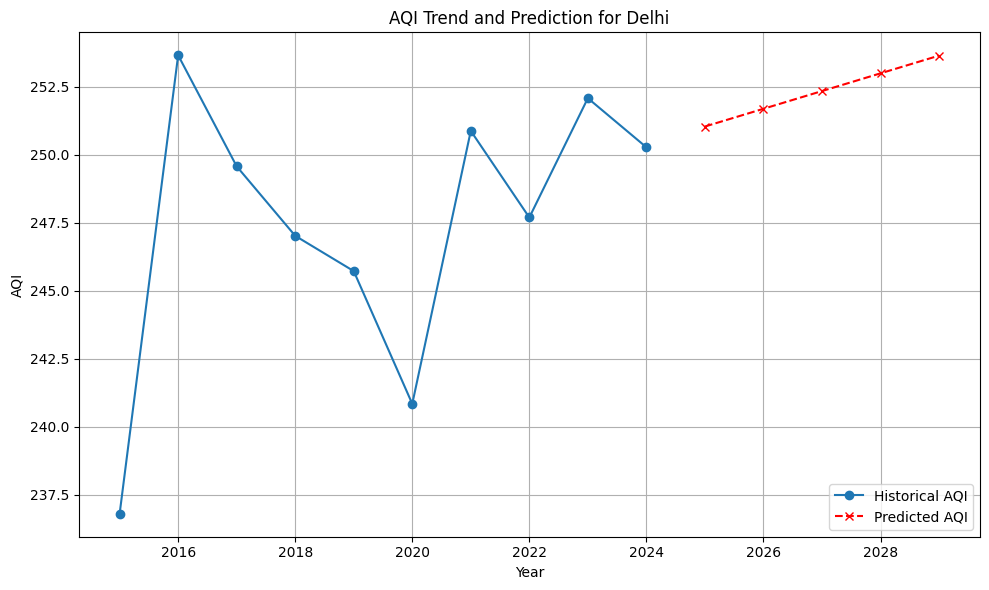

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Group by city and year
station_day_df['Year'] = pd.to_datetime(station_day_df['Datetime']).dt.year
yearly_aqi = station_day_df.groupby(['City', 'Year'])['AQI'].mean().reset_index()

# Choose one city (e.g., Delhi)
city = 'Delhi'
delhi_data = yearly_aqi[yearly_aqi['City'] == city]

# Reshape for sklearn
X = delhi_data['Year'].values.reshape(-1, 1)
y = delhi_data['AQI'].values

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict for future years
future_years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label='Historical AQI')
plt.plot(future_years, predictions, marker='x', linestyle='--', color='red', label='Predicted AQI')
plt.title(f"AQI Trend and Prediction for {city}")
plt.xlabel("Year")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


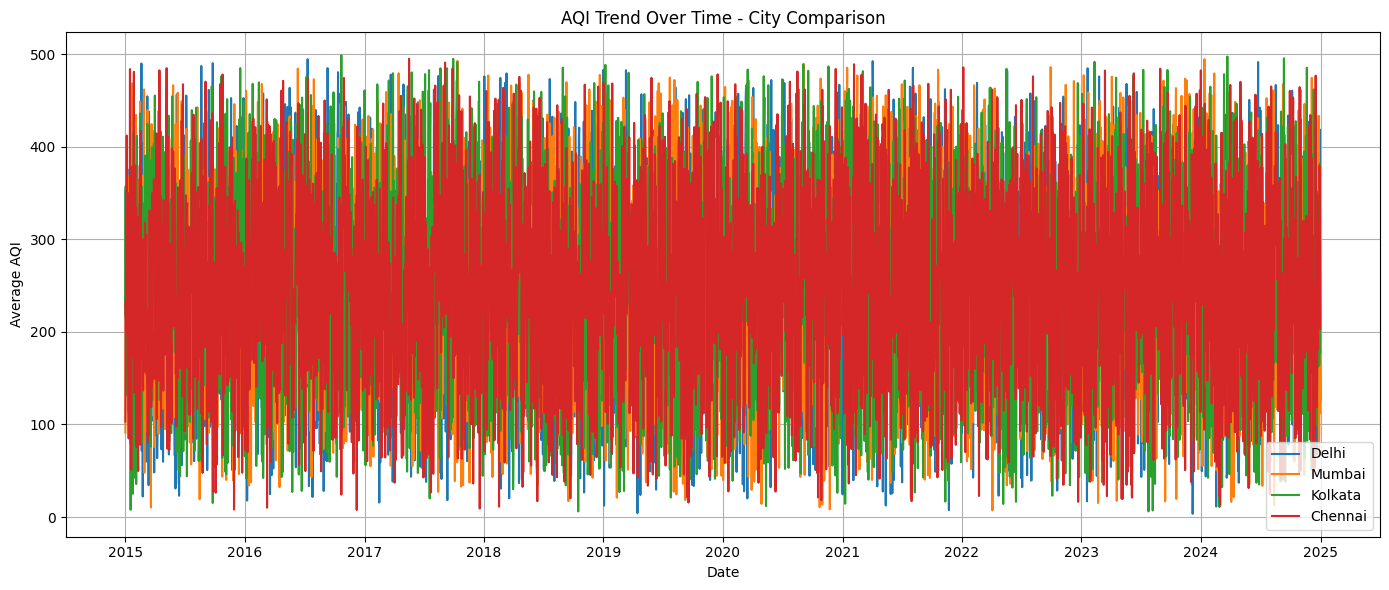

In [26]:
station_day_df['Datetime'] = pd.to_datetime(station_day_df['Datetime'])

# Example for multiple cities
cities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai']
plt.figure(figsize=(14, 6))

for city in cities:
    city_data = station_day_df[station_day_df['City'] == city]
    city_avg = city_data.groupby('Datetime')['AQI'].mean()
    plt.plot(city_avg.index, city_avg.values, label=city)

plt.title("AQI Trend Over Time - City Comparison")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

e:\py\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


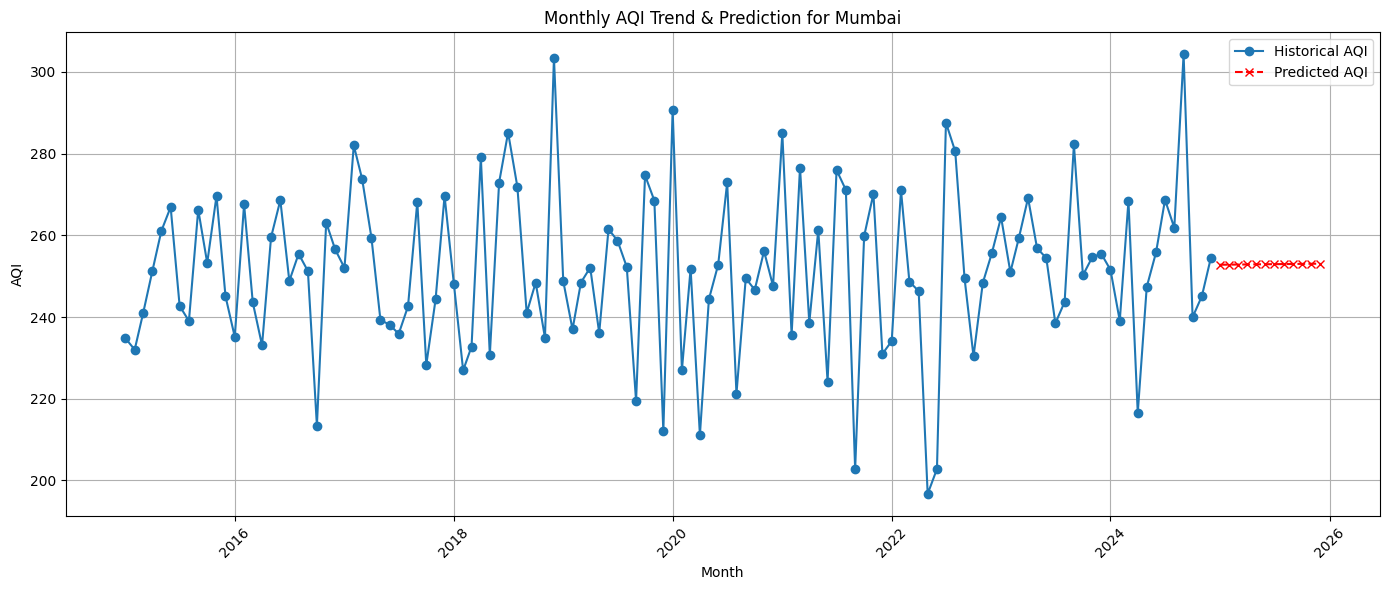

In [31]:
station_day_df['YearMonth'] = station_day_df['Datetime'].dt.to_period('M')
# Choose a city
city = 'Mumbai'

# Filter data for that city
city_df = station_day_df[station_day_df['City'] == city]

# Group by YearMonth and calculate mean AQI
monthly_aqi = city_df.groupby('YearMonth')['AQI'].mean().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_aqi['YearMonth'] = monthly_aqi['YearMonth'].astype(str)
monthly_aqi['Datetime'] = pd.to_datetime(monthly_aqi['YearMonth'])

# Drop rows with missing AQI
monthly_aqi = monthly_aqi.dropna()
# Create MonthIndex for model input
monthly_aqi['MonthIndex'] = np.arange(len(monthly_aqi))
X = monthly_aqi[['MonthIndex']]    # Features
y = monthly_aqi['AQI']               # Target

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X, y)
# Predict for next 12 months
future_months = np.arange(len(monthly_aqi), len(monthly_aqi) + 12).reshape(-1, 1)
future_aqi = model.predict(future_months)

# Generate corresponding future dates
last_date = monthly_aqi['Datetime'].max()
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=12, freq='MS')
# Plot
plt.figure(figsize=(14, 6))

# Plot historical data
plt.plot(monthly_aqi['Datetime'], y, marker='o', label='Historical AQI')

# Plot predictions
plt.plot(future_dates, future_aqi, marker='x', linestyle='--', color='red', label='Predicted AQI')

plt.title(f"Monthly AQI Trend & Prediction for {city}")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
